In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='roberta-large'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'wd':[]}

In [4]:
lr = 1.0e-5
weight_decay = [0.1, 0.01]

for wd in weight_decay:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, weight decay {wd}')
    data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=16)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=wd,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       accumulation_steps=2,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['wd'].append(wd)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search roberta-large, learning rate 1e-05, weight decay 0.1


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.9967	Val Loss:	1.5251	Accuracy:	0.4911	F1:	0.3151
2 / 30: Train Loss:	0.5952	Val Loss:	0.9428	Accuracy:	0.6805	F1:	0.5459
3 / 30: Train Loss:	0.3593	Val Loss:	0.8149	Accuracy:	0.7485	F1:	0.7121
4 / 30: Train Loss:	0.2358	Val Loss:	0.7663	Accuracy:	0.7751	F1:	0.7508
5 / 30: Train Loss:	0.1501	Val Loss:	0.9234	Accuracy:	0.7367	F1:	0.7021
6 / 30: Train Loss:	0.0886	Val Loss:	0.8698	Accuracy:	0.7663	F1:	0.7567
7 / 30: Train Loss:	0.0551	Val Loss:	0.9678	Accuracy:	0.7515	F1:	0.7208
8 / 30: Train Loss:	0.0417	Val Loss:	0.9636	Accuracy:	0.7899	F1:	0.7823
9 / 30: Train Loss:	0.0387	Val Loss:	0.9436	Accuracy:	0.7692	F1:	0.7529
10 / 30: Train Loss:	0.0273	Val Loss:	0.9486	Accuracy:	0.7722	F1:	0.7555
11 / 30: Train Loss:	0.0135	Val Loss:	0.9353	Accuracy:	0.8018	F1:	0.7923
12 / 30: Train Loss:	0.0177	Val Loss:	1.0245	Accuracy:	0.7692	F1:	0.7498
13 / 30: Train Loss:	0.0124	Val Loss:	1.0319	Accuracy:	0.7751	F1:	0.7640
14 / 30: Train Loss:	0.0098	Val Loss:	0.9213	Accuracy:	0.804

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.0086	Val Loss:	1.9148	Accuracy:	0.3314	F1:	0.1791
2 / 30: Train Loss:	0.7838	Val Loss:	1.1128	Accuracy:	0.6243	F1:	0.4425
3 / 30: Train Loss:	0.4698	Val Loss:	0.8825	Accuracy:	0.7160	F1:	0.6273
4 / 30: Train Loss:	0.3291	Val Loss:	0.7617	Accuracy:	0.7544	F1:	0.7049
5 / 30: Train Loss:	0.2194	Val Loss:	0.7020	Accuracy:	0.7811	F1:	0.7348
6 / 30: Train Loss:	0.1437	Val Loss:	0.6749	Accuracy:	0.7959	F1:	0.7786
7 / 30: Train Loss:	0.0985	Val Loss:	0.7405	Accuracy:	0.7840	F1:	0.7434
8 / 30: Train Loss:	0.0712	Val Loss:	0.7695	Accuracy:	0.7811	F1:	0.7550
9 / 30: Train Loss:	0.0551	Val Loss:	0.9379	Accuracy:	0.7574	F1:	0.7472
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.78      0.76      0.77        67
               anecdote       0.97      0.91      0.94        43
         cherry picking       0.71      0.88      0.78        56
   

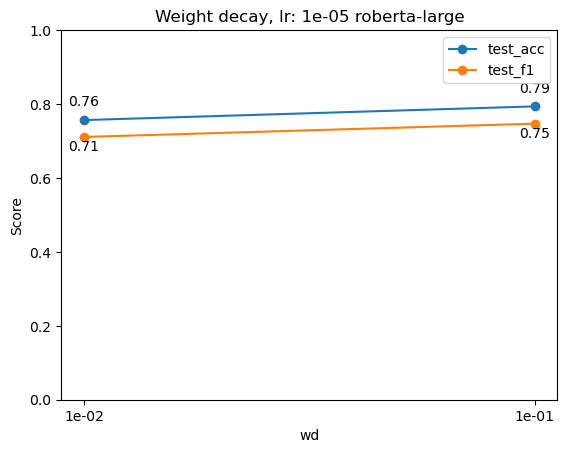

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Weight decay, lr: {lr} {model_checkpoint}',
                        column='wd',
                        sci_format=True)

In [6]:
%reset -f